In [67]:
from bs4 import BeautifulSoup as soup #extrair informação
from urllib.request import urlopen as uReq #fazer requisição
import csv

In [68]:
rotten_url = ['https://www.rottentomatoes.com/m/joker_2019/reviews']

In [69]:
rotten_url

['https://www.rottentomatoes.com/m/joker_2019/reviews']

In [70]:
reviews=[]
for url in rotten_url:
    uClient = uReq(url)
    page_html = uClient.read()
    uClient.close()
    page_soup = soup(page_html, "html.parser")
    reviews = reviews + [review.text for review in page_soup.find_all('div', {'class': 'the_review'})]

In [71]:
len(reviews) #20 reviews por página

20

In [72]:
reviews

['\r\n                    "Joker" a lovely homage to films of a previous era and a subversive take on the "formula" of superhero/comic-book media.\r\n                ',
 "\r\n                    If cinema's job is to make us feel, to make us reflect upon how we've been living life, and to acknowledge some of its own brand of crazy, then I think Joker did a damn good job.\r\n                ",
 "\r\n                    It's a disappointing film only because it could have been so much better.\r\n                ",
 '\r\n                    [Phoenix as the Joker] burns like he were an archangel on heroin, a contorted otherworldly presence that under a different constellation of stars would have ended up a saint.\r\n                ',
 "\r\n                    Ultimately, Joker is neither deserving of the controversy it's stirred up nor some of the praise it's received. Phoenix's performance is the highlight of what is ultimately a relatively tame film.\r\n                ",
 '\r\n        

In [73]:
#salvando os reviews em CSV
with open('joker_reviews.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(reviews)

In [74]:
import csv
import nltk #lida com linguagem natural humana  
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize #separar palavras por seus sentidos e remove algumas (stopwords)

from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reisa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reisa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\reisa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [75]:
#importar infos do CSV salvo
with open('joker_reviews.csv', 'r') as f:
    reader = csv.reader(f)
    reviews = list(reader)[0]

In [76]:
stop_words = set(stopwords.words('english'))
word_tokens = []
for review in reviews:
    word_tokens = word_tokens + word_tokenize(review)
filtered_word_reviews = [w for w in word_tokens if not w in stop_words]

In [77]:
print(word_tokens[:10]) #tokens iniciais 

['``', 'Joker', "''", 'a', 'lovely', 'homage', 'to', 'films', 'of', 'a']


In [78]:
print(filtered_word_reviews[:10]) #tokens sem as stop words

['``', 'Joker', "''", 'lovely', 'homage', 'films', 'previous', 'era', 'subversive', 'take']


In [93]:
def drawWordCloud(words, filename):
    text = ''
    for w in words:
        text = text + ' ' + w
    mask = np.array(Image.open('joker_mask.jpg')) #transforma imagem em um array
    image_colors = ImageColorGenerator(mask)
    
    wordcloud = WordCloud(background_color='white', max_words=1000, mask=mask).generate(text)
    
    fig, axes = plt.subplots(1, 2, figsize=(16,20))
    axes[0].imshow(mask, interpolation='bilinear')
    axes[0].imshow(wordcloud.recolor(color_func=image_colors, random_state=3), interpolation='bilinear')
    
    #for para remover os limites do gráfico
    for ax in axes:
        ax.set_axis_off()
    plt.savefig(fname='.png', format='png', dpi=200)
    plt.show()
    

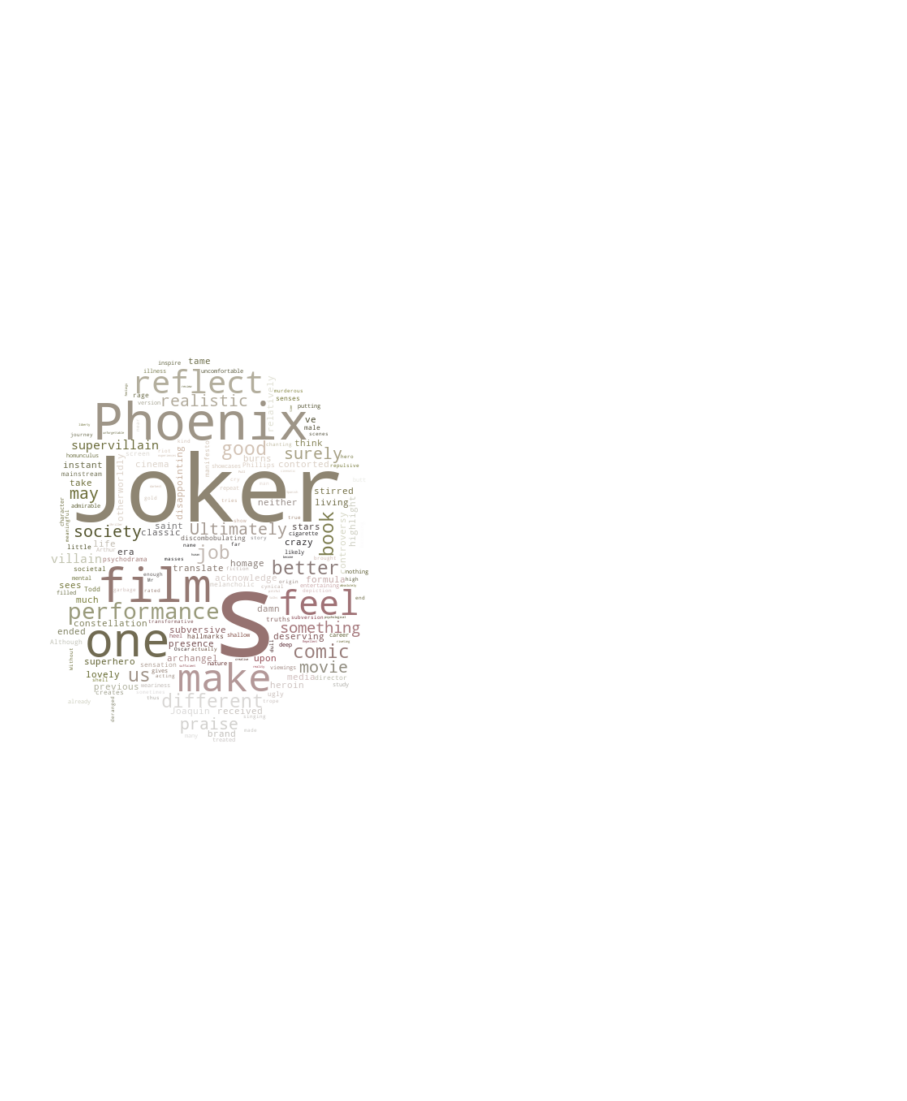

In [95]:
drawWordCloud(filtered_word_reviews, 'wc-joker')

In [97]:
adjs = [word for (word, pos) in nltk.pos_tag(filtered_word_reviews) if(pos[:2] == 'JJ')] #jj categoriza adjetivos
print(adjs[:10])

['previous', 'subversive', 'formula', 'superhero/comic-book', 'good', 'disappointing', '[', 'different', 'stirred', 'tame']


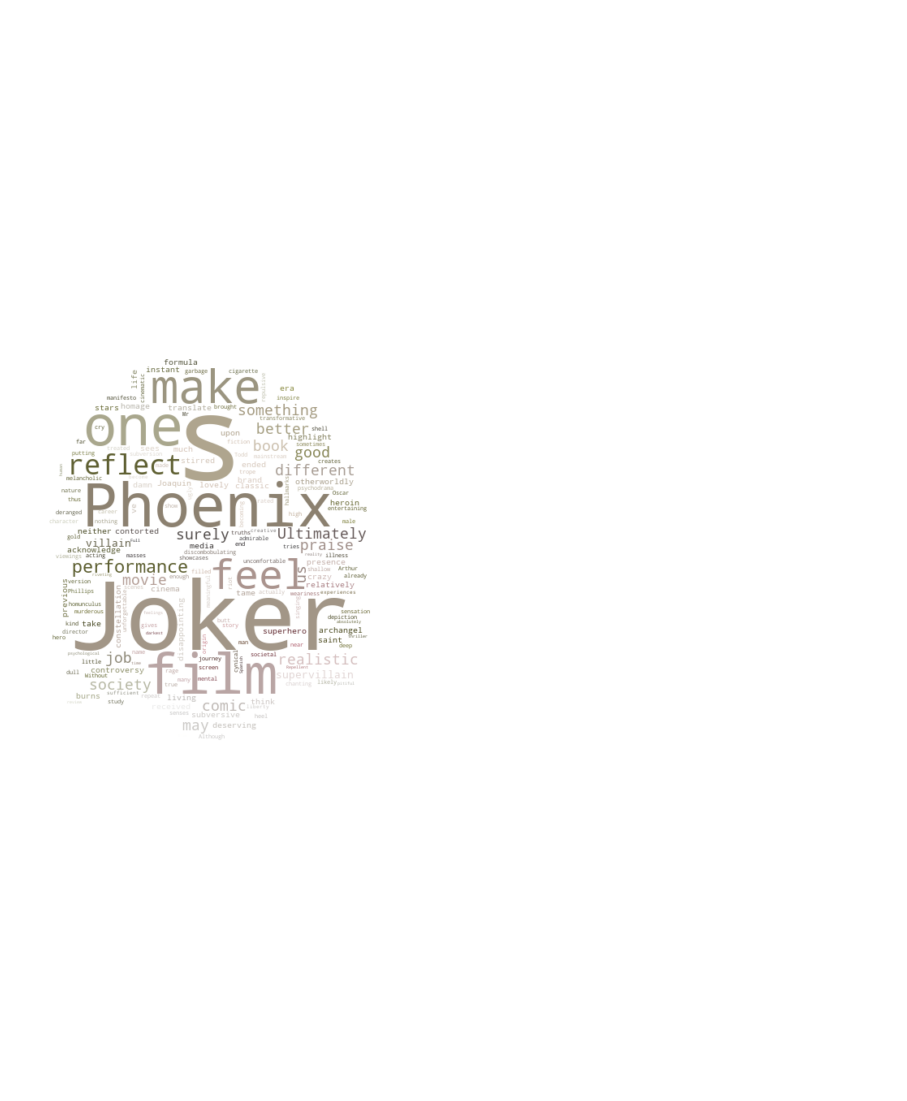

In [98]:
drawWordCloud(filtered_word_reviews, 'wc-joker')